<a href="https://colab.research.google.com/github/MartinBlondelle/Analyse_vente/blob/main/analys_vente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Chargement des données
data = pd.read_csv('ventes_boutique.csv')

# Afficher les premières lignes
print(data.head())

  Date de vente    Produit  Quantité  Prix unitaire  Client     Région
0    2024-01-01    T-shirt         3             20   Alice      Paris
1    2024-01-03  Casquette         2             15     Bob       Lyon
2    2024-01-05    T-shirt         1             20  Claire  Marseille
3    2024-01-07   Lunettes         4             30   David      Lille
4    2024-01-10  Casquette         3             15     Eve      Paris


In [2]:
# Vérifier s'il y a des valeurs manquantes
print(data.isnull().sum())

# S'assurer que la colonne "Date de vente" est bien au format date
data['Date de vente'] = pd.to_datetime(data['Date de vente'])

# Afficher les informations du dataset
print(data.info())

Date de vente    0
Produit          0
Quantité         0
Prix unitaire    0
Client           0
Région           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date de vente  5 non-null      datetime64[ns]
 1   Produit        5 non-null      object        
 2   Quantité       5 non-null      int64         
 3   Prix unitaire  5 non-null      int64         
 4   Client         5 non-null      object        
 5   Région         5 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 368.0+ bytes
None


In [3]:
# Résumé statistique des données
print(data.describe())


             Date de vente  Quantité  Prix unitaire
count                    5  5.000000       5.000000
mean   2024-01-05 04:48:00  2.600000      20.000000
min    2024-01-01 00:00:00  1.000000      15.000000
25%    2024-01-03 00:00:00  2.000000      15.000000
50%    2024-01-05 00:00:00  3.000000      20.000000
75%    2024-01-07 00:00:00  3.000000      20.000000
max    2024-01-10 00:00:00  4.000000      30.000000
std                    NaN  1.140175       6.123724


In [4]:
# Produits les plus vendus
produits_populaires = data.groupby('Produit')['Quantité'].sum().sort_values(ascending=False)
print(produits_populaires)


Produit
Casquette    5
Lunettes     4
T-shirt      4
Name: Quantité, dtype: int64


In [5]:
# Ajouter une colonne "Mois"
data['Mois'] = data['Date de vente'].dt.month

# Ventes par mois
ventes_par_mois = data.groupby('Mois')['Quantité'].sum()
print(ventes_par_mois)


Mois
1    13
Name: Quantité, dtype: int64


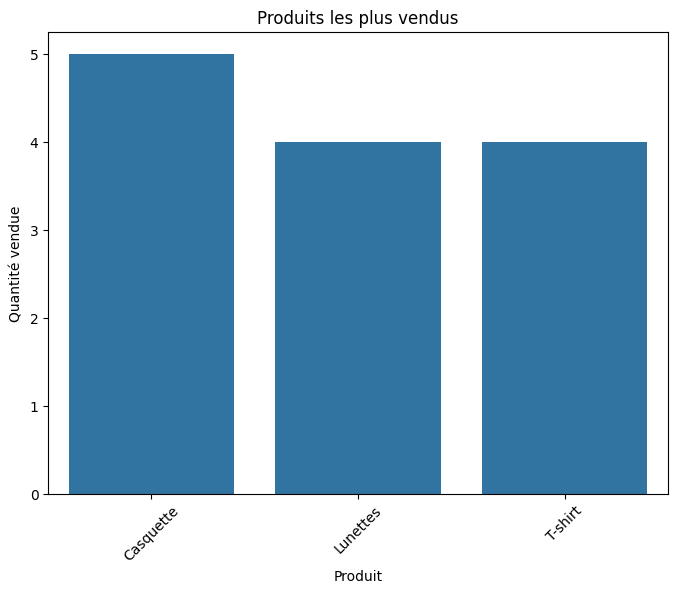

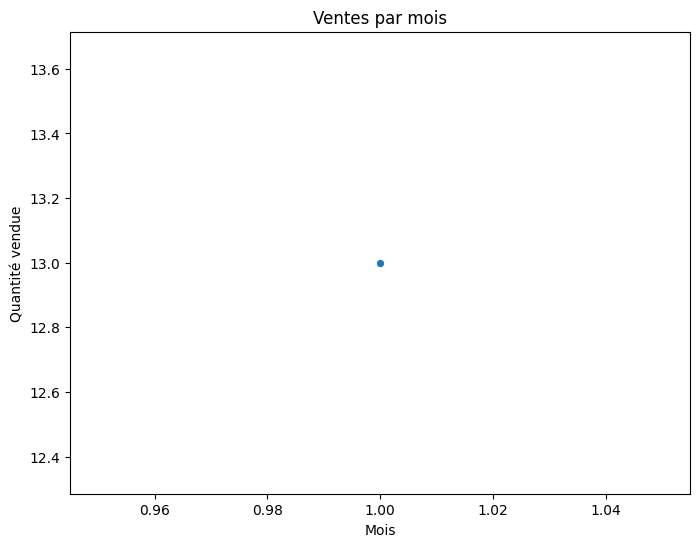

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique des produits les plus vendus
plt.figure(figsize=(8,6))
sns.barplot(x=produits_populaires.index, y=produits_populaires.values)
plt.title('Produits les plus vendus')
plt.xlabel('Produit')
plt.ylabel('Quantité vendue')
plt.xticks(rotation=45)
plt.show()

# Graphique des ventes par mois
plt.figure(figsize=(8,6))
sns.lineplot(x=ventes_par_mois.index, y=ventes_par_mois.values, marker='o')
plt.title('Ventes par mois')
plt.xlabel('Mois')
plt.ylabel('Quantité vendue')
plt.show()

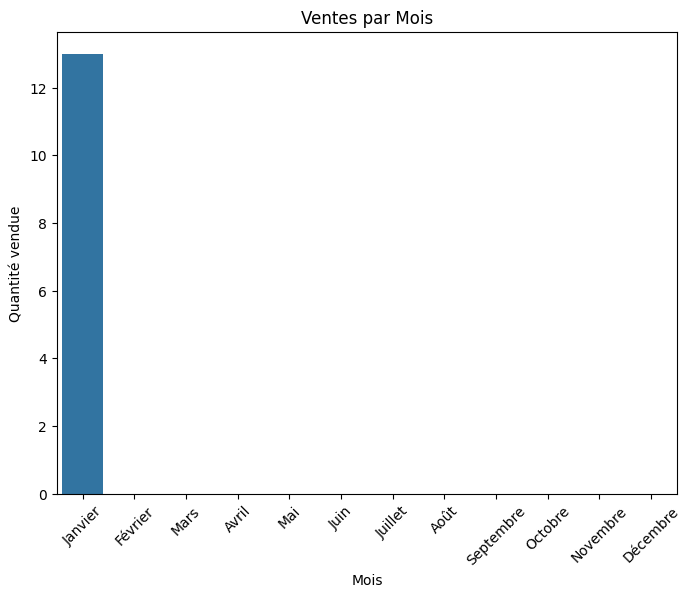

In [7]:
df = pd.DataFrame(data)

# Extraire les mois sous forme de texte
df['Mois'] = df['Date de vente'].dt.month
mois_labels = {1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril', 5: 'Mai', 6: 'Juin',
               7: 'Juillet', 8: 'Août', 9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'}

# Remplacer les numéros par les labels des mois
df['Mois'] = df['Mois'].map(mois_labels)

# Grouper par mois et calculer les ventes totales
ventes_par_mois = df.groupby('Mois')['Quantité'].sum().reindex(mois_labels.values())

# Graphique des ventes par mois avec les mois en labels
plt.figure(figsize=(8,6))
sns.barplot(x=ventes_par_mois.index, y=ventes_par_mois.values)
plt.title('Ventes par Mois')
plt.xlabel('Mois')
plt.ylabel('Quantité vendue')
plt.xticks(rotation=45)
plt.show()